```
Student-1
Name:TASFI ISLAM
ID# 21-45504-3
```

```
Student-2
Name:Nusrat Jannat
ID# 21-45795-3
```

```
Student-3
Name:Nishat Tasnim
ID# 22-46034-1
```

```
Student-4
Name: MST. KAMRUNNAHAR SHILA
ID# 22-47263-1
```



*   Mount your google drive.





*   Import all necessary libraries.



In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

•	**Task 1:** Read/Load the dataset file in your program. Use Pandas library to complete this task.

In [ ]:
uploaded = files.upload()
df = pd.read_csv('DrugDatasetMofied(Group-8).csv')
pd.options.display.max_rows = 9999
print("Original Dataset:")
print(df)


Saving DrugDatasetMofied(Group-8).csv to DrugDatasetMofied(Group-8) (1).csv
Original Dataset:
     Age     Sex      BP Cholesterol  Na_to_K   Drug
0     23       F    HIGH        HIGH   25.355  drugY
1     47       M     LOW        HIGH   13.093  drugC
2     47       M     LOW        HIGH   10.114  drugC
3     28       F  NORMAL        HIGH    7.798  drugX
4     61       F     LOW        HIGH   18.043  drugY
5     22       F  NORMAL        HIGH    8.607  drugX
6     49       F  NORMAL        HIGH   16.275  drugY
7     41       M     LOW        HIGH   11.037  drugC
8     60       M  NORMAL        HIGH   15.171  drugY
9     43       M     LOW      NORMAL   19.368  drugY
10    47       F     NaN        HIGH   11.767  drugC
11    34       F    HIGH      NORMAL   19.199  drugY
12    43       M     LOW        HIGH   15.376  drugY
13    74       F     LOW        HIGH   20.942  drugY
14    50       F  NORMAL        HIGH   12.703  drugX
15    16       F    HIGH      NORMAL   15.516  drugY
16   

•	**Task 2:** Apply appropriate data cleaning techniques to the dataset. In this step, replace bad data using proper methods and do not delete any record except duplicate records. Use Pandas library to complete this task.

In [ ]:
df = pd.read_csv('DrugDatasetMofied(Group-8).csv')

x = df["BP"].mode()[0]
y = df["Na_to_K"].mean()

df.fillna({"Na_to_K": y}, inplace=True)
df.fillna({"BP": x}, inplace=True)

print("\nAfter Filling Missing Values in 'Na_to_K' and 'BP':")
print(df)


wrong_sex = df[~df['Sex'].isin(['M', 'F'])]
print("\nWrong Sex Format:\n", wrong_sex)

df['Sex'] = df['Sex'].replace({
    'FEMALE': 'F',
    'MALE': 'M'
})

print("\nAfter Fixing 'Sex' Column:")
print(df)


valid_bp = ['LOW', 'NORMAL', 'HIGH']
invalid_bp = df[~df['BP'].isin(valid_bp)]
print("\nInvalid BP Entries:\n", invalid_bp)

df['BP'] = df['BP'].replace('HITH', 'HIGH')
df['BP'] = df['BP'].replace('NORNAL', 'NORMAL')

print("\nAfter Fixing BP Column:")
print(df)


wrong_age_data = df[(df['Age'] < 0) | (df['Age'] > 120)]
print("\nInvalid Age Values:\n", wrong_age_data)

df.loc[df['Age'] < 0, 'Age'] = abs(df.loc[df['Age'] < 0, 'Age'])
df.loc[df['Age'] > 120, 'Age'] = df['Age'].median()
df['Age'] = df['Age'].astype(int)

print("\nAfter Fixing Age Column:")
print(df)


out_values = df[df['Na_to_K'] > 100]
print("\nExtreme (wrong) Na_to_K values:\n", out_values)

df.loc[df['Na_to_K'] > 100, 'Na_to_K'] = df['Na_to_K'].median()

print("\nAfter Fixing Extreme Na_to_K Values:")
print(df)

print("\nDuplicate Rows:")
print(df.duplicated())

df.drop_duplicates(inplace=True)

print("\nAfter Removing Duplicates:")
print(df)



After Filling Missing Values in 'Na_to_K' and 'BP':
     Age     Sex      BP Cholesterol     Na_to_K   Drug
0     23       F    HIGH        HIGH   25.355000  drugY
1     47       M     LOW        HIGH   13.093000  drugC
2     47       M     LOW        HIGH   10.114000  drugC
3     28       F  NORMAL        HIGH    7.798000  drugX
4     61       F     LOW        HIGH   18.043000  drugY
5     22       F  NORMAL        HIGH    8.607000  drugX
6     49       F  NORMAL        HIGH   16.275000  drugY
7     41       M     LOW        HIGH   11.037000  drugC
8     60       M  NORMAL        HIGH   15.171000  drugY
9     43       M     LOW      NORMAL   19.368000  drugY
10    47       F    HIGH        HIGH   11.767000  drugC
11    34       F    HIGH      NORMAL   19.199000  drugY
12    43       M     LOW        HIGH   15.376000  drugY
13    74       F     LOW        HIGH   20.942000  drugY
14    50       F  NORMAL        HIGH   12.703000  drugX
15    16       F    HIGH      NORMAL   15.516000  d

•	**Task 3:** Draw graphs to analyze the frequency distributions of the features. Use Matplotlib library to complete this task. Draw all the plots in a single figure so that all plots can be seen in one diagram (use subplot() function).

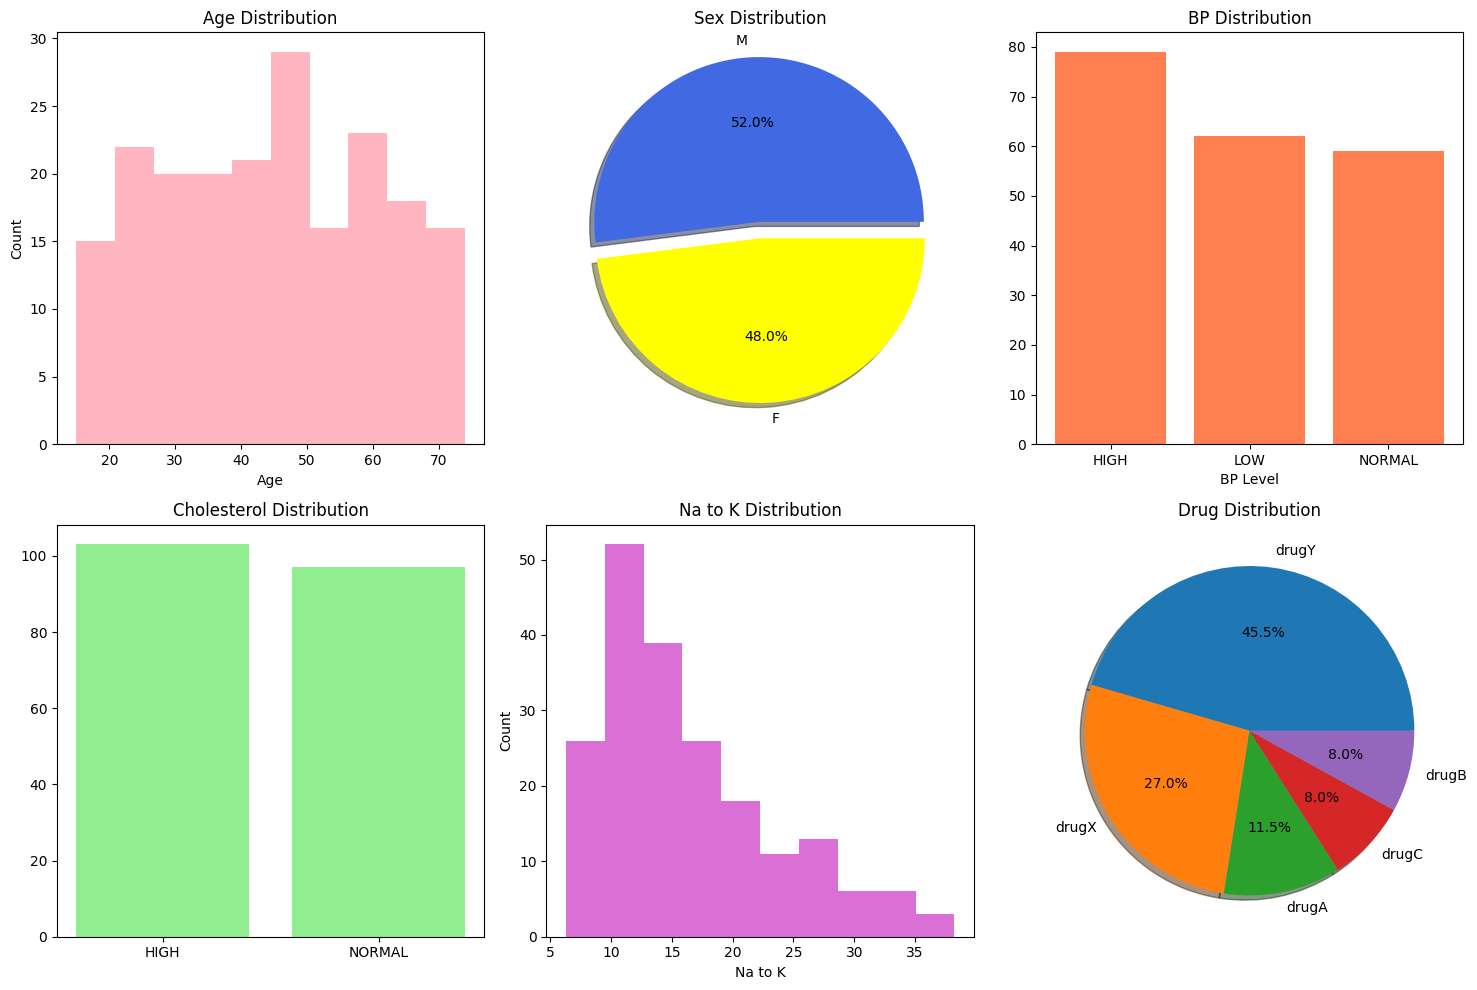

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.hist(df['Age'], bins=10, color='lightpink')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')


plt.subplot(2, 3, 2)
sex_counts = df['Sex'].value_counts()
mycolor = ['royalblue', 'yellow']
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', explode=[0.1, 0], shadow=True, colors=mycolor)
plt.title("Sex Distribution")


plt.subplot(2, 3, 3)
bp_counts = df['BP'].value_counts()
plt.bar(bp_counts.index, bp_counts.values, color='coral')
plt.title("BP Distribution")
plt.xlabel("BP Level")


plt.subplot(2, 3, 4)
chol_counts = df['Cholesterol'].value_counts()
plt.bar(chol_counts.index, chol_counts.values, color='lightgreen')
plt.title("Cholesterol Distribution")


plt.subplot(2, 3, 5)
plt.hist(df['Na_to_K'], bins=10, color='orchid')
plt.title('Na to K Distribution')
plt.xlabel('Na to K')
plt.ylabel('Count')


plt.subplot(2, 3, 6)
drug_counts = df['Drug'].value_counts()
plt.pie(drug_counts, labels=drug_counts.index, autopct='%1.1f%%', shadow=True)
plt.title("Drug Distribution")

plt.tight_layout()
plt.show()


•	**Task 4:** Perform scaling on the features of the dataset. Remember that you will need to apply data conversion before scaling if required.

In [ ]:
le_sex = LabelEncoder()
le_bp = LabelEncoder()
le_chol = LabelEncoder()
le_drug = LabelEncoder()

df['Sex'] = le_sex.fit_transform(df['Sex'])
df['BP'] = le_bp.fit_transform(df['BP'])
df['Cholesterol'] = le_chol.fit_transform(df['Cholesterol'])
df['Drug'] = le_drug.fit_transform(df['Drug'])

X = df.drop('Drug', axis=1)
y = df['Drug']

print("Before Scaling:")
print(X.head())

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("\nAfter Scaling:")
print(scaled_df.head())


Before Scaling:
   Age  Sex  BP  Cholesterol  Na_to_K
0   23    0   0            0   25.355
1   47    1   1            0   13.093
2   47    1   1            0   10.114
3   28    0   2            0    7.798
4   61    0   1            0   18.043

After Scaling:
        Age       Sex        BP  Cholesterol   Na_to_K
0 -1.309113 -1.040833 -1.091410    -0.970437  1.281130
1  0.155287  0.960769  0.121268    -0.970437 -0.437377
2  0.155287  0.960769  0.121268    -0.970437 -0.854880
3 -1.004030 -1.040833  1.333946    -0.970437 -1.179465
4  1.009521 -1.040833  0.121268    -0.970437  0.256361


•	**Task 5:** Split your data into two parts: Training dataset and Testing dataset. You must use the function train_test_split() to complete this task and use the value 3217 as the value of the random_state parameter of this function.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=3217)

print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Testing Labels Shape:", y_test.shape)

print("\nFirst 5 rows of X_train:")
print(pd.DataFrame(X_train).head())

print("\nFirst 5 labels in y_train:")
print(y_train.head().to_string(index=False))

print("\nFirst 5 rows of X_test:")
print(pd.DataFrame(X_test).head())

print("\nFirst 5 labels in y_test:")
print(y_test.head().to_string(index=False))

Training Features Shape: (160, 5)
Testing Features Shape: (40, 5)
Training Labels Shape: (160,)
Testing Labels Shape: (40,)

First 5 rows of X_train:
          0         1         2         3         4
0  0.155287 -1.040833  1.333946  1.030464 -1.335731
1 -0.332846 -1.040833  1.333946  1.030464 -0.911641
2  0.155287  0.960769  0.121268  1.030464  2.428529
3 -0.149796  0.960769  0.121268 -0.970437  0.532454
4 -0.515896 -1.040833  1.333946 -0.970437  0.075569

First 5 labels in y_train:
3
3
4
4
4

First 5 rows of X_test:
          0         1         2         3         4
0 -0.088779  0.960769  1.333946  1.030464 -0.470171
1 -0.759963 -1.040833 -1.091410  1.030464  1.367882
2  1.802738 -1.040833  0.121268 -0.970437  0.662653
3 -1.797247  0.960769  1.333946 -0.970437 -0.999234
4  0.643421 -1.040833 -1.091410 -0.970437 -0.733932

First 5 labels in y_test:
3
4
4
3
1


•	**Task 6:** Apply Naïve Bayes Classifier to the dataset. Build (train) your prediction model in this step.

In [ ]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

y_train_pred = nb_model.predict(X_train)
y_test_pred = nb_model.predict(X_test)

print("First 10 Training Predictions vs Actual:")
print(pd.DataFrame({'Predicted': y_train_pred[:10], 'Actual': y_train[:10].values}))

print("\nFirst 10 Test Predictions vs Actual:")
print(pd.DataFrame({'Predicted': y_test_pred[:10], 'Actual': y_test[:10].values}))


First 10 Training Predictions vs Actual:
   Predicted  Actual
0          3       3
1          3       3
2          4       4
3          2       4
4          4       4
5          0       4
6          0       0
7          2       4
8          0       4
9          0       0

First 10 Test Predictions vs Actual:
   Predicted  Actual
0          3       3
1          4       4
2          2       4
3          3       3
4          1       1
5          0       4
6          2       4
7          3       3
8          0       0
9          0       2


•	**Task 7:** Calculate the confusion matrix for your model. Interpret it in detail in the report.

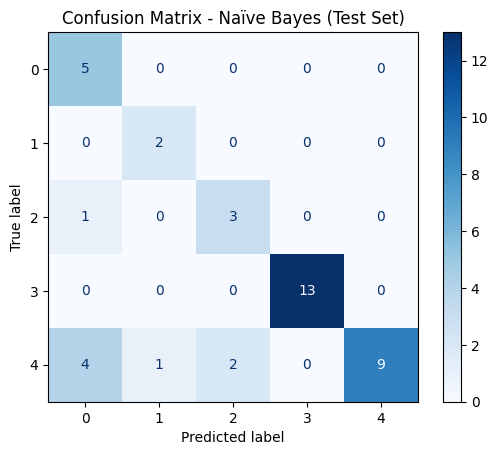

Confusion Matrix (as array):
[[ 5  0  0  0  0]
 [ 0  2  0  0  0]
 [ 1  0  3  0  0]
 [ 0  0  0 13  0]
 [ 4  1  2  0  9]]


In [ ]:
cm = confusion_matrix(y_test, y_test_pred)


disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Naïve Bayes (Test Set)")
plt.show()


print("Confusion Matrix (as array):")
print(cm)


•	**Taks 8:** Calculate your model's train and test accuracy and compare them.

In [ ]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", round(train_accuracy * 100, 2), "%")
print("Testing Accuracy:", round(test_accuracy * 100, 2), "%")


Training Accuracy: 79.38 %
Testing Accuracy: 80.0 %


•	**Taks 9:** Show how 10-fold cross-validation can be used to build a naïve bayes classifier and report the accuracy of this model.

In [ ]:
nb_cv_model = GaussianNB()

cv_scores = cross_val_score(nb_cv_model, X_scaled, y, cv=10)

print("Accuracy for each of the 10 folds:")
print(cv_scores)

average_cv_accuracy = round(cv_scores.mean() * 100, 2)
print("\nAverage Accuracy from 10-Fold Cross-Validation:", average_cv_accuracy, "%")


Accuracy for each of the 10 folds:
[0.5  0.8  0.75 0.8  0.6  0.7  0.75 0.65 0.55 0.65]

Average Accuracy from 10-Fold Cross-Validation: 67.5 %
